# Fallstudie Tablet GmbH

## Problemstellung

- Warum war die wirtschaftlich Entwicklung in den letzten beiden Jahren negativ? 
- Welche Faktoren beeinflussten die Situation?
- Wie kann die wirtschaftliche Situation verbessert werden?

## Hypothesen & Fragestellungen (bisher):
- Veränderung der Nachfrage hin zu Tablet Pro & Tablet Mini und weg von Tablet Basic (Silas)
    - Customer Rating als möglicher Indikator (Daniel)
- Downtime als Grund für den geringeren Umsatz in Online-Vertriebskanälen (Vincenzo)
- Sind bestimmte Regionen abhängig von bestimmten Vertriebskanälen/Produkten? (Ali)
- Was verursachte den Umsatzrückgang zum Jahreswechsel? (Ali)

## Einlesen

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_crm = pd.read_csv("./data_csv/CRM_data.csv")
df_downtime = pd.read_csv("./data_csv/Downtime.csv")
df_preise = pd.read_csv("./data_csv/Preise.csv")

df_a_online = pd.read_csv("./data_csv/RegionA_online.csv")
df_a_phone = pd.read_csv("./data_csv/RegionA_phone.csv")
df_a_store = pd.read_csv("./data_csv/RegionA_store.csv")

df_b_online = pd.read_csv("./data_csv/RegionB_online.csv")
df_b_phone = pd.read_csv("./data_csv/RegionB_phone.csv")
df_b_store = pd.read_csv("./data_csv/RegionB_store.csv")

df_c_online = pd.read_csv("./data_csv/RegionC_online.csv")
df_c_phone = pd.read_csv("./data_csv/RegionC_phone.csv")
df_c_store = pd.read_csv("./data_csv/RegionC_store.csv")

df_d_online = pd.read_csv("./data_csv/RegionD_online.csv")
df_d_phone = pd.read_csv("./data_csv/RegionD_phone.csv")
df_d_store = pd.read_csv("./data_csv/RegionD_store.csv")

## Aufbereiten

### CRM-Daten:

In [4]:
df_crm.head()

,id,vorname,nachname,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.2
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.4
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.7
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.4
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.1


In [5]:
df_crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               340000 non-null  int64  
 1   vorname          340000 non-null  object 
 2   nachname         340000 non-null  object 
 3   iban             340000 non-null  object 
 4   email            340000 non-null  object 
 5   customer_rating  340000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.6+ MB


In [6]:
# Spalten auf Englisch umbenennen
df_crm = df_crm.rename(columns={
    'vorname': 'first_name',
    'nachname': 'last_name',
})

df_crm.head()

,id,first_name,last_name,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.2
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.4
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.7
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.4
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.1


### Preisdaten:

In [7]:
df_preise

,Jahr,product,preis
0,"""2021""",Tablet Pro,999
1,"""""20022""",Tablet Pro,999
2,"""2021""",Tablet Mini,680
3,"""""20022""",Tablet Mini,550
4,"""2021""",Tablet Basics,529
5,"""""20022""",Tablet Basics,499


In [8]:
# Umbenennen der Spalte "Jahr" in "year"
df_preise = df_preise.rename(columns={"Jahr": "year",
                                      "preis": "price"})

# Entfernen von Anfuehrungszeichen
df_preise['year'] = df_preise['year'].apply(lambda x: x.strip('"'))  
# Korrigieren der falschen Jahreszahlen
df_preise['year'] = df_preise['year'].replace({'20022': '2022'})  
# Umwandeln der Spalte "jahr" in Datumsformat
df_preise['year'] = pd.to_datetime(df_preise['year'], format='%Y')

# Spalte "jahr" als Jahreszahl extrahieren
df_preise['year'] = df_preise['year'].dt.year

# Werte "Tablet Basics" in "Tablet Basic" ändern
df_preise['product'] = df_preise['product'].replace({'Tablet Basics': 'Tablet Basic'})

df_preise

,year,product,price
0,2021,Tablet Pro,999
1,2022,Tablet Pro,999
2,2021,Tablet Mini,680
3,2022,Tablet Mini,550
4,2021,Tablet Basic,529
5,2022,Tablet Basic,499


### Downtime-Daten:

In [9]:
df_downtime

,Unnamed: 0,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


In [10]:
# Erste Spalte in "year" umbenennen
df_downtime = df_downtime.rename(columns={"Unnamed: 0": "year"})

# Spalte "year" in Datumsformat umwandeln
df_downtime['year'] = pd.to_datetime(df_downtime['year'], format='%Y')

# Spalte "year" als Jahreszahl extrahieren
df_downtime['year'] = df_downtime['year'].dt.year

# Umbenennen der Spalten "Region A" bis "Region D" in "region_a" bis "region_d"
df_downtime = df_downtime.rename(columns={"Region A": "region_a", 
                                          "Region B": "region_b", 
                                          "Region C": "region_c", 
                                          "Region D": "region_d"})

df_downtime

,year,region_a,region_b,region_c,region_d
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


### Transaktionsdaten:

In [11]:
# Hinzufuegen der Spalten "region" und "channel" mit den entsprechenden Werten
df_a_online = df_a_online.assign(region='A', channel='online')
df_a_phone = df_a_phone.assign(region='A', channel='phone')
df_a_store = df_a_store.assign(region='A', channel='store')

df_b_online = df_b_online.assign(region='B', channel='online')
df_b_phone = df_b_phone.assign(region='B', channel='phone')
df_b_store = df_b_store.assign(region='B', channel='store')

df_c_online = df_c_online.assign(region='C', channel='online')
df_c_phone = df_c_phone.assign(region='C', channel='phone')
df_c_store = df_c_store.assign(region='C', channel='store')

df_d_online = df_d_online.assign(region='D', channel='online')
df_d_phone = df_d_phone.assign(region='D', channel='phone')
df_d_store = df_d_store.assign(region='D', channel='store')

In [12]:
# Umbenennen der Spalte "PRODUKT" in "product" in df_b_phone
df_b_phone = df_b_phone.rename(columns={"PRODUKT": "product"})

In [13]:
# Alle Regionen in einen Dataframe zusammenfassen
df_sales = pd.concat([df_a_online, df_a_phone, df_a_store,
                      df_b_online, df_b_phone, df_b_store, 
                      df_c_online, df_c_phone, df_c_store, 
                      df_d_online, df_d_phone, df_d_store])

In [14]:
# Umbenennen der Spalten "Tablet Basic", "Tablet Mini" und "Tablet Pro", "kosten_basic", "kosten_mini" und "kosten_pro"
df_sales = df_sales.rename(columns={
    "Tablet Basic": "tablet_basic",
    "Tablet Mini": "tablet_mini",
    "Tablet Pro": "tablet_pro",
    "kosten_basic": "cost_basic",
    "kosten_mini": "cost_mini",
    "kosten_pro": "cost_pro"
})

In [15]:
# Umwandeln der Spalte "jahr" in Datumsformat
df_sales["date"] = pd.to_datetime(df_sales["date"])

In [16]:
# NaN in den Spalten cost_basic, cost_mini und cost_pro durch 0 ersetzen
df_sales['cost_basic'] = df_sales['cost_basic'].fillna(0)
df_sales['cost_mini'] = df_sales['cost_mini'].fillna(0)
df_sales['cost_pro'] = df_sales['cost_pro'].fillna(0)

In [17]:
# NaN in "discount" durch 1 ersetzen
df_sales['discount'] = df_sales['discount'].fillna(1)

In [18]:
# Zeige Werte der Spalte "product" an
df_sales['product'].unique()

array(['Tablet Basic', 'Tablet Mini', 'Tablet Pro', 'Tablet Basic...'],
      dtype=object)

In [19]:
# Werte "Tablet Basic..." in "Tablet Basic" aendern
df_sales['product'] = df_sales['product'].replace({'Tablet Basic...': 'Tablet Basic'})

In [20]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            340000 non-null  datetime64[ns]
 1   product         340000 non-null  object        
 2   discount        340000 non-null  float64       
 3   amount          340000 non-null  int64         
 4   tablet_basic    340000 non-null  int64         
 5   tablet_mini     340000 non-null  int64         
 6   tablet_pro      340000 non-null  int64         
 7   cost_basic      340000 non-null  float64       
 8   cost_mini       340000 non-null  float64       
 9   cost_pro        340000 non-null  float64       
 10  transaction_id  340000 non-null  int64         
 11  region          340000 non-null  object        
 12  channel         340000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 36.3+ MB


In [21]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel
0,2021-11-01,Tablet Basic,1.0,5,1,0,0,170.018118,0.0,0.000000,22,A,online
1,2021-11-01,Tablet Basic,1.0,7,1,0,0,170.019765,0.0,0.000000,24,A,online
2,2021-11-01,Tablet Basic,0.9,7,1,0,0,210.032941,0.0,0.000000,40,A,online
3,2021-11-01,Tablet Basic,1.0,10,1,0,0,170.078236,0.0,0.000000,95,A,online
4,2021-11-01,Tablet Basic,1.0,4,1,0,0,170.085647,0.0,0.000000,104,A,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.987029,339978,D,store
49435,2022-10-31,Tablet Pro,1.0,1,0,0,1,0.000000,0.0,984.988882,339981,D,store
49436,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.991971,339986,D,store
49437,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,984.995059,339991,D,store


## Transformieren

In [22]:
# df_sales und df_crm zusammenfuegen
df_sales = pd.merge(df_sales, df_crm, left_on='transaction_id', right_on='id', how='inner')

In [23]:
# Spalte "id" entfernen
df_sales = df_sales.drop(columns=['id'])

In [24]:
# Neue Spalten "year", "mmonth" und "week" erstellen
df_sales = df_sales.assign(year=df_sales['date'].dt.year,
                           month=df_sales['date'].dt.month,
                           week=df_sales['date'].dt.isocalendar().week)

In [25]:
# Neue Spalte "price" erstellen, basierend auf den Werten in der Spalte "price" in df_preise
df_sales = df_sales.merge(df_preise, on=["year", "product"], how="left")

In [26]:
# Neue Spalte "cost" erstellen
df_sales['cost'] = df_sales["cost_basic"] + df_sales["cost_mini"] + df_sales["cost_pro"]

In [27]:
# Neue Spalte "cost_total" erstellen
df_sales['cost_total'] = df_sales["cost"] * df_sales["amount"]

In [28]:
# Neue Spalte "revenue" erstellen
df_sales['revenue'] = df_sales['price'] * df_sales['amount'] * df_sales['discount']

In [29]:
# Profit pro Stueck berechnen
df_sales["profit_per_piece"] = (df_sales["price"] * df_sales["discount"]) - df_sales["cost"]

In [30]:
# Profit des gesamten Verkaufs berechnen
df_sales["profit_total"] = df_sales["profit_per_piece"] * df_sales["amount"]

In [31]:
# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,first_name,last_name,iban,email,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Basic,1.0,5,1,0,0,170.018118,0.0,0.000000,22,A,online,Friedhilde,Kuhl,DE23093007879691629842,friedhilde.kuhl@yahoo.de,7.1,2021,11,44,529,170.018118,850.090589,2645.0,358.981882,1794.909411
1,2021-11-01,Tablet Basic,1.0,7,1,0,0,170.019765,0.0,0.000000,24,A,online,Heide-Marie,Fischer,DE26303459399974289421,heide-marie.fischer@gmx.de,5.9,2021,11,44,529,170.019765,1190.138353,3703.0,358.980235,2512.861647
2,2021-11-01,Tablet Basic,0.9,7,1,0,0,210.032941,0.0,0.000000,40,A,online,Ester,Pruschke,DE04679916372817044326,ester.pruschke@gmail.com,7.5,2021,11,44,529,210.032941,1470.230589,3332.7,266.067059,1862.469411
3,2021-11-01,Tablet Basic,1.0,10,1,0,0,170.078236,0.0,0.000000,95,A,online,Klaus,Blümel,DE54334149840465696270,klaus.blümel@aol.de,6.6,2021,11,44,529,170.078236,1700.782355,5290.0,358.921764,3589.217645
4,2021-11-01,Tablet Basic,1.0,4,1,0,0,170.085647,0.0,0.000000,104,A,online,Waldemar,Fritsch,DE54862551075047386387,waldemar.fritsch@web.de,7.3,2021,11,44,529,170.085647,680.342589,2116.0,358.914353,1435.657411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.987029,339978,D,store,Carla,Klemm,DE95736837564420121887,carla.klemm@web.de,7.6,2022,10,44,999,984.987029,2954.961088,2997.0,14.012971,42.038912
339996,2022-10-31,Tablet Pro,1.0,1,0,0,1,0.000000,0.0,984.988882,339981,D,store,Hans-Uwe,Döring,DE96536545575195298222,hans-uwe.döring@yahoo.de,7.6,2022,10,44,999,984.988882,984.988882,999.0,14.011118,14.011118
339997,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.991971,339986,D,store,Irene,Aumann,DE83463083316300535191,irene.aumann@hotmail.de,8.3,2022,10,44,999,984.991971,2954.975912,2997.0,14.008029,42.024088
339998,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,984.995059,339991,D,store,Jolanthe,Spieß,DE73981381785498034616,jolanthe.spieß@gmx.de,9.2,2022,10,44,999,984.995059,1969.990118,1998.0,14.004941,28.009882


In [32]:
# Sortieren nach Datum
df_sales.sort_values(by=['transaction_id'], inplace=True)

# Reset der Index-Spalte
df_sales.reset_index(drop=True, inplace=True)

In [33]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,first_name,last_name,iban,email,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Pro,1.0,4,0,0,1,0.000000,0.0,695.000000,0,C,store,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.2,2021,11,44,999,695.000000,2780.000000,3996.0,304.000000,1216.000000
1,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.000824,0.0,0.000000,1,D,online,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.4,2021,11,44,529,170.000824,510.002471,1587.0,358.999176,1076.997529
2,2021-11-01,Tablet Basic,0.9,5,1,0,0,200.001647,0.0,0.000000,2,C,phone,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.7,2021,11,44,529,200.001647,1000.008235,2380.5,276.098353,1380.491765
3,2021-11-01,Tablet Basic,1.0,2,1,0,0,170.002471,0.0,0.000000,3,B,online,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.4,2021,11,44,529,170.002471,340.004941,1058.0,358.997529,717.995059
4,2021-11-01,Tablet Basic,1.0,2,1,0,0,150.003294,0.0,0.000000,4,C,online,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.1,2021,11,44,529,150.003294,300.006588,1058.0,378.996706,757.993412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,864.997529,339995,D,phone,Martin,Heinrich,DE06833178600136945770,martin.heinrich@aol.de,8.4,2022,10,44,999,864.997529,1729.995059,1998.0,134.002471,268.004941
339996,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,864.998147,339996,D,phone,Hartwig,Koch II,DE66942502046709852454,hartwig.koch_ii@yahoo.de,8.2,2022,10,44,999,864.998147,2594.994441,2997.0,134.001853,402.005559
339997,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,944.998765,339997,D,store,Reza,Boucsein,DE35718077975432977896,reza.boucsein@web.de,9.9,2022,10,44,999,944.998765,1889.997529,1998.0,54.001235,108.002471
339998,2022-10-31,Tablet Pro,1.0,4,0,0,1,0.000000,0.0,864.999382,339998,B,store,Thekla,Vollbrecht,DE65129187433166256313,thekla.vollbrecht@web.de,8.7,2022,10,44,999,864.999382,3459.997529,3996.0,134.000618,536.002471


## Visualisieren

In [34]:
df_sales.groupby(["product","year", "month"]).agg({"customer_rating" : {"mean", "median", "min", "max"}, "amount" : "count"}).round(2)
#linear regression between customer_rating and amount


customer_rating                   amount
                                    max median  mean  min  count
product      year month                                         
Tablet Basic 2021 11               10.0    6.6  6.79  3.7  11406
                  12               10.0    6.2  6.39  3.4  11077
             2022 1                10.0    5.9  6.04  3.0   9897
                  2                10.0    5.6  5.70  2.7   8419
                  3                10.0    5.3  5.42  2.8   8149
                  4                10.0    5.1  5.20  2.2   7071
                  5                10.0    4.8  4.92  2.1   6497
                  6                10.0    4.6  4.73  2.0   5158
                  7                10.0    4.5  4.56  1.8   4509
                  8                10.0    4.3  4.42  2.0   3556
                  9                 9.8    4.2  4.31  1.6   2538
                  10                8.4    4.1  4.23  1.6   1723
Tablet Mini  2021 11               10.0    8.8  8.75  5.2   8986
                  12               10.0    8.6  8.61  5.3   9169
             2022 1                10.0    8.5  8.49  5.2   9335
                  2                10.0    8.3  8.37  4.8   8645
                  3                10.0    8.2  8.23  4.3   9351
                  4                10.0    8.0  8.10  4.3   9099
                  5                10.0    7.9  7.94  4.3   9420
                  6                10.0    7.7  7.83  4.4   9003
                  7                10.0    7.6  7.68  3.9   9227
                  8                10.0    7.4  7.52  3.3   9349
                  9                10.0    7.3  7.40  4.0   9046
                  10               10.0    7.2  7.29  4.2   9370
Tablet Pro   2021 11               10.0    7.8  7.93  5.0   3061
                  12               10.0    7.8  7.94  4.5   4928
             2022 1                10.0    7.8  7.96  5.0   6876
                  2                10.0    7.9  8.02  4.7   7601
                  3                10.0    8.0  8.05  4.7  10033
                  4                10.0    8.0  8.11  5.0  11309
                  5                10.0    8.1  8.17  4.5  13356
                  6                10.0    8.1  8.21  4.5  14962
                  7                10.0    8.2  8.31  4.7  17062
                  8                10.0    8.3  8.38  5.0  18595
                  9                10.0    8.4  8.48  5.3  20088
                  10               10.0    8.5  8.57  5.1  22129

## Modellieren

## Vetriebskanäle

In [35]:
df_sales_online = df_sales[df_sales['channel'] == 'online']
df_sales_phone = df_sales[df_sales['channel'] == 'phone']
df_sales_store = df_sales[df_sales['channel'] == 'store']

### Verkaufte Geräte pro Verkaufskanal

In [36]:
# Group by month and count sales
df_sales_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_monthly['date'] = df_sales_online_monthly['date'].dt.to_timestamp()
df_sales_phone_monthly['date'] = df_sales_phone_monthly['date'].dt.to_timestamp()
df_sales_store_monthly['date'] = df_sales_store_monthly['date'].dt.to_timestamp()

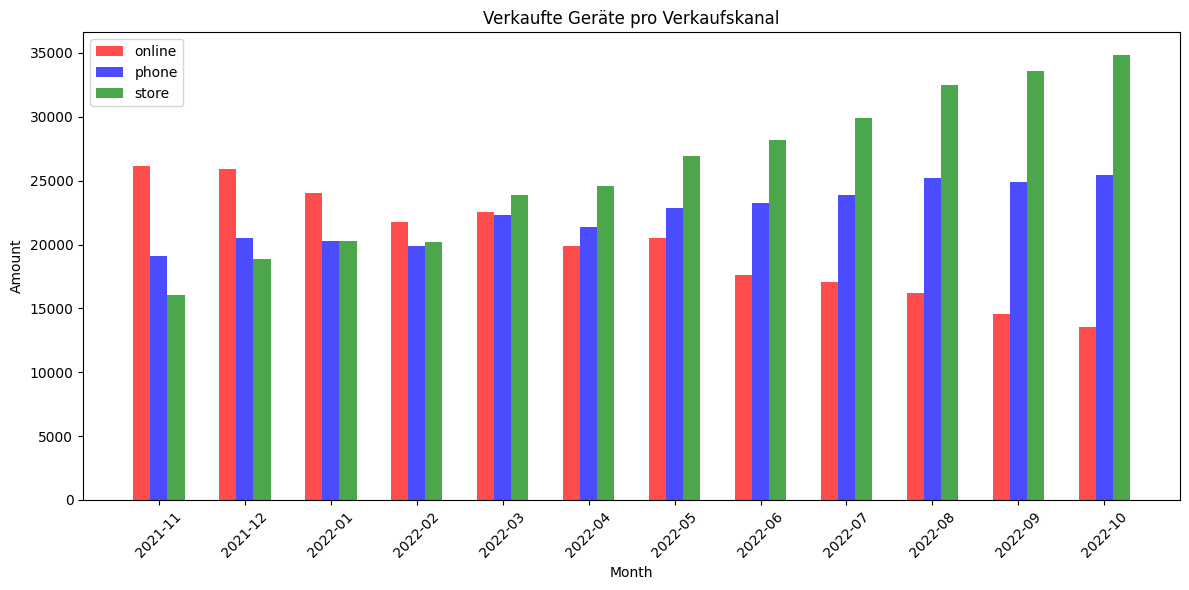

In [52]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_online_monthly['amount'], width=bar_width, label='online', color='r', alpha=0.7)
plt.bar(x, df_sales_phone_monthly['amount'], width=bar_width, label='phone', color='b', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_monthly['amount'], width=bar_width, label='store', color='g', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufte Geräte pro Verkaufskanal')
plt.xlabel('Month')
plt.ylabel('Amount')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Verkaufte Produkte pro Verkaufskanal

#### Online

In [38]:
df_sales_online_basic = df_sales_online[df_sales_online['product'] == 'Tablet Basic']
df_sales_online_mini = df_sales_online[df_sales_online['product'] == 'Tablet Mini']
df_sales_online_pro = df_sales_online[df_sales_online['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_online_basic_monthly = df_sales_online_basic.groupby(df_sales_online_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_mini_monthly = df_sales_online_mini.groupby(df_sales_online_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_pro_monthly = df_sales_online_pro.groupby(df_sales_online_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_basic_monthly['date'] = df_sales_online_basic_monthly['date'].dt.to_timestamp()
df_sales_online_mini_monthly['date'] = df_sales_online_mini_monthly['date'].dt.to_timestamp()
df_sales_online_pro_monthly['date'] = df_sales_online_pro_monthly['date'].dt.to_timestamp()

#### Phone

In [39]:
df_sales_phone_basic = df_sales_phone[df_sales_phone['product'] == 'Tablet Basic']
df_sales_phone_mini = df_sales_phone[df_sales_phone['product'] == 'Tablet Mini']
df_sales_phone_pro = df_sales_phone[df_sales_phone['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_phone_basic_monthly = df_sales_phone_basic.groupby(df_sales_phone_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_mini_monthly = df_sales_phone_mini.groupby(df_sales_phone_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_pro_monthly = df_sales_phone_pro.groupby(df_sales_phone_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_phone_basic_monthly['date'] = df_sales_phone_basic_monthly['date'].dt.to_timestamp()
df_sales_phone_mini_monthly['date'] = df_sales_phone_mini_monthly['date'].dt.to_timestamp()
df_sales_phone_pro_monthly['date'] = df_sales_phone_pro_monthly['date'].dt.to_timestamp()

#### Store

In [40]:
df_sales_store_basic = df_sales_store[df_sales_store['product'] == 'Tablet Basic']
df_sales_store_mini = df_sales_store[df_sales_store['product'] == 'Tablet Mini']
df_sales_store_pro = df_sales_store[df_sales_store['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_store_basic_monthly = df_sales_store_basic.groupby(df_sales_store_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_mini_monthly = df_sales_store_mini.groupby(df_sales_store_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_pro_monthly = df_sales_store_pro.groupby(df_sales_store_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_store_basic_monthly['date'] = df_sales_store_basic_monthly['date'].dt.to_timestamp()
df_sales_store_mini_monthly['date'] = df_sales_store_mini_monthly['date'].dt.to_timestamp()
df_sales_store_pro_monthly['date'] = df_sales_store_pro_monthly['date'].dt.to_timestamp()

#### Create Graphs

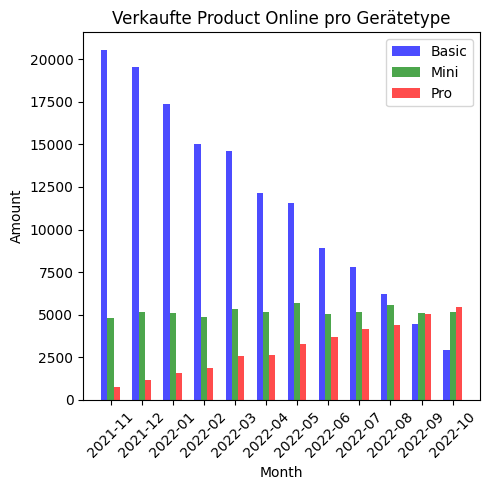

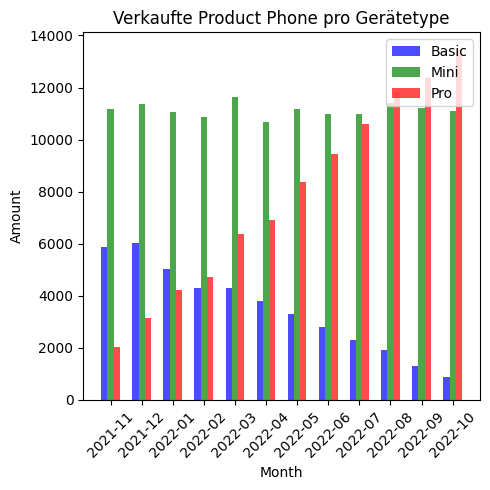

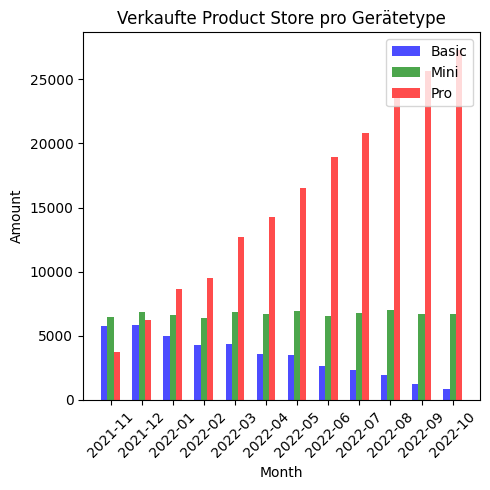

In [41]:
# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_online_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_online_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_online_pro_monthly['amount'], width=bar_width, label='Pro', color='r', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufte Product Online pro Gerätetype')
plt.xlabel('Month')
plt.ylabel('Amount')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_phone_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_phone_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_phone_pro_monthly['amount'], width=bar_width, label='Pro', color='r', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufte Product Phone pro Gerätetype')
plt.xlabel('Month')
plt.ylabel('Amount')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_store_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_store_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_pro_monthly['amount'], width=bar_width, label='Pro', color='r', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufte Product Store pro Gerätetype')
plt.xlabel('Month')
plt.ylabel('Amount')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

#### Aufteilung der Verkaufkänäle in Regionen

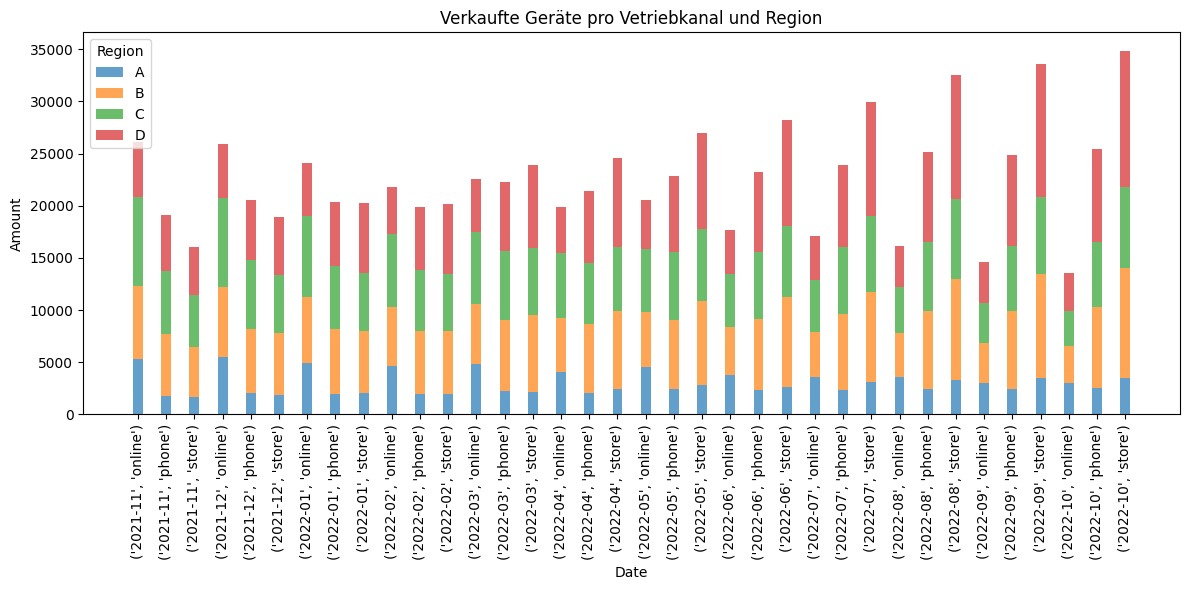

In [42]:
# Annahme: Ihre DataFrame 'df_sales' enthält Spalten 'date', 'region', 'amount'

# Extrahieren Sie den Monat und das Jahr aus der 'date'-Spalte
df_sales['month_year'] = df_sales['date'].dt.strftime('%Y-%m')

# Gruppieren Sie Ihre Daten nach 'month_year' und 'region' und summieren Sie die Werte
grouped_data = df_sales.groupby(['month_year', 'channel', 'region'])['amount'].sum().unstack(fill_value=0)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the x-axis values for each date
x_labels = grouped_data.index
x = np.arange(len(x_labels))

# Define the width for each bar
bar_width = 0.35

# Create the stacked bar plots for each region
bottom = np.zeros(len(x_labels))
regions = grouped_data.columns

for region in regions:
    plt.bar(x, grouped_data[region], width=bar_width, label=region, alpha=0.7, bottom=bottom)
    bottom += grouped_data[region]

# Enhance the plot with titles and labels
plt.title('Verkaufte Geräte pro Vetriebkanal und Region')
plt.xlabel('Date')
plt.ylabel('Amount')

# Set x-axis ticks and labels
plt.xticks(x, x_labels, rotation=90)

# Add legend
plt.legend(loc='upper left', title='Region')

# Show the plot
plt.tight_layout()
plt.show()

## Rabatte

In [43]:
# Group by month and count sales
df_discounts_monthly = df_sales.groupby(df_sales['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_monthly['date'] = df_discounts_monthly['date'].dt.to_timestamp()
df_discounts_online_monthly['date'] = df_discounts_online_monthly['date'].dt.to_timestamp()
df_discounts_phone_monthly['date'] = df_discounts_phone_monthly['date'].dt.to_timestamp()
df_discounts_store_monthly['date'] = df_discounts_store_monthly['date'].dt.to_timestamp()

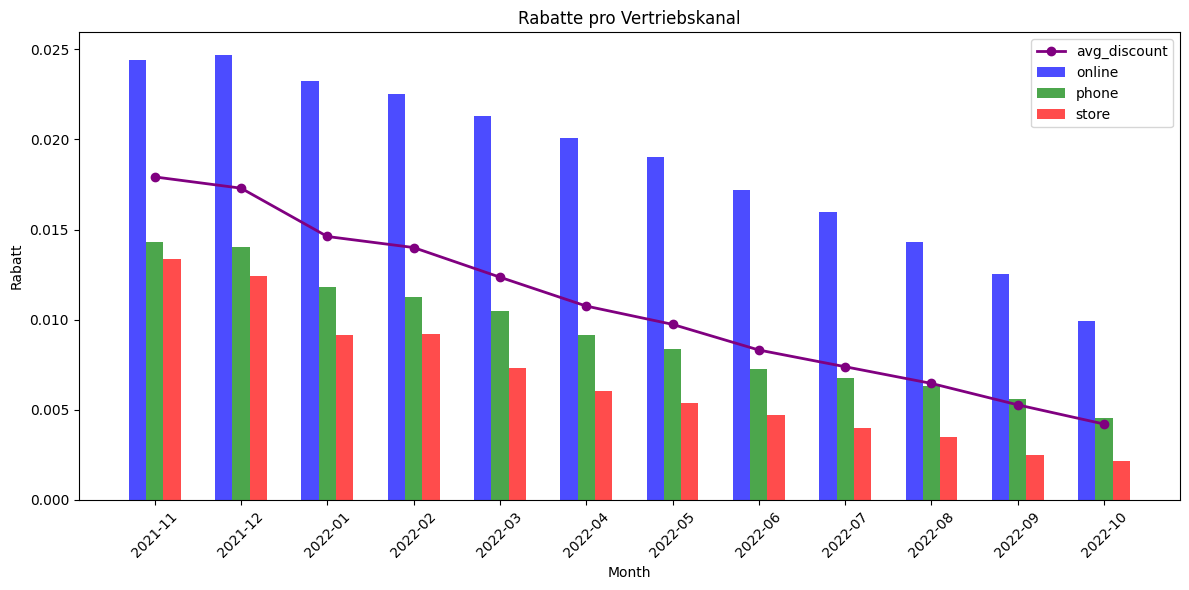

In [44]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (1 - df_discounts_online_monthly['discount']), width=bar_width, label='online', color='b', alpha=0.7)
plt.bar(x, (1 - df_discounts_phone_monthly['discount']), width=bar_width, label='phone', color='g', alpha=0.7)
plt.bar(x + bar_width, (1 - df_discounts_store_monthly['discount']), width=bar_width, label='store', color='r', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (1 - df_discounts_monthly['discount']), label='avg_discount', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Vertriebskanal')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
df_sales_A = df_sales[df_sales['region'] == 'A']
df_sales_B = df_sales[df_sales['region'] == 'B']
df_sales_C = df_sales[df_sales['region'] == 'C']
df_sales_D = df_sales[df_sales['region'] == 'D']

In [46]:
# Group by month and count sales
df_discounts_A_monthly = df_sales_A.groupby(df_sales_A['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_B_monthly = df_sales_B.groupby(df_sales_B['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_C_monthly = df_sales_C.groupby(df_sales_C['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_D_monthly = df_sales_D.groupby(df_sales_D['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_A_monthly['date'] = df_discounts_A_monthly['date'].dt.to_timestamp()
df_discounts_B_monthly['date'] = df_discounts_B_monthly['date'].dt.to_timestamp()
df_discounts_C_monthly['date'] = df_discounts_C_monthly['date'].dt.to_timestamp()
df_discounts_D_monthly['date'] = df_discounts_D_monthly['date'].dt.to_timestamp()

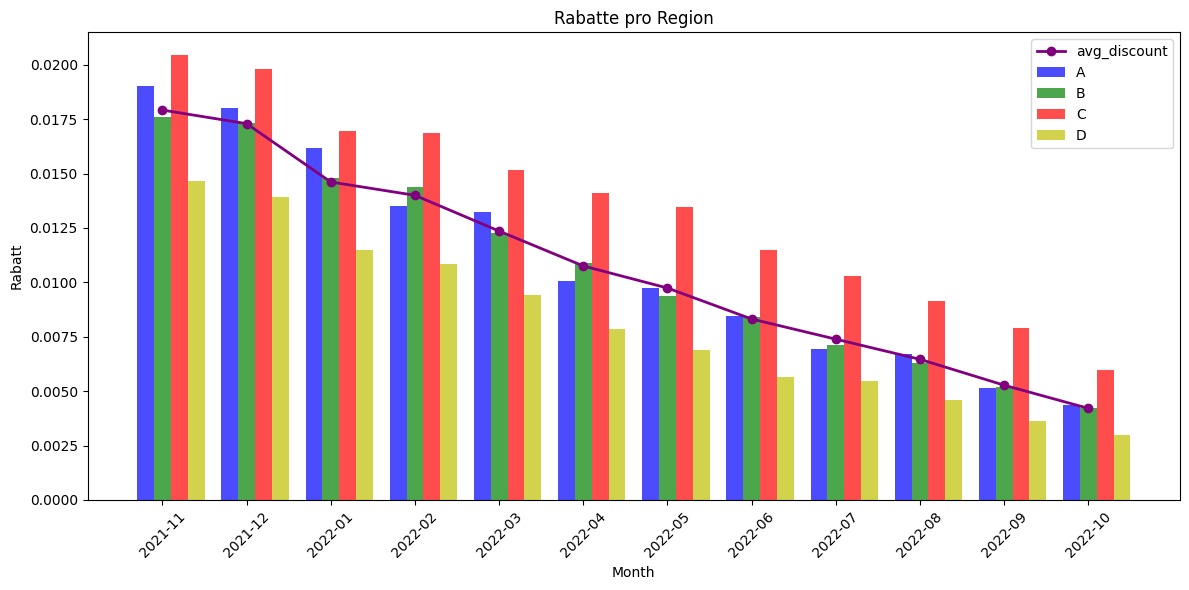

In [47]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (1 - df_discounts_A_monthly['discount']), width=bar_width, label='A', color='b', alpha=0.7)
plt.bar(x, (1 - df_discounts_B_monthly['discount']), width=bar_width, label='B', color='g', alpha=0.7)
plt.bar(x + bar_width, (1 - df_discounts_C_monthly['discount']), width=bar_width, label='C', color='r', alpha=0.7)
plt.bar(x + (2 * bar_width), (1 - df_discounts_D_monthly['discount']), width=bar_width, label='D', color='y', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (1 - df_discounts_monthly['discount']), label='avg_discount', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Region')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [48]:
df_sales_basic = df_sales[df_sales['product'] == 'Tablet Basic']
df_sales_mini = df_sales[df_sales['product'] == 'Tablet Mini']
df_sales_pro = df_sales[df_sales['product'] == 'Tablet Pro']

In [49]:
# Group by month and count sales
df_discounts_basic_monthly = df_sales_basic.groupby(df_sales_basic['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_mini_monthly = df_sales_mini.groupby(df_sales_mini['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_pro_monthly = df_sales_pro.groupby(df_sales_pro['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_basic_monthly['date'] = df_discounts_basic_monthly['date'].dt.to_timestamp()
df_discounts_mini_monthly['date'] = df_discounts_mini_monthly['date'].dt.to_timestamp()
df_discounts_pro_monthly['date'] = df_discounts_pro_monthly['date'].dt.to_timestamp()

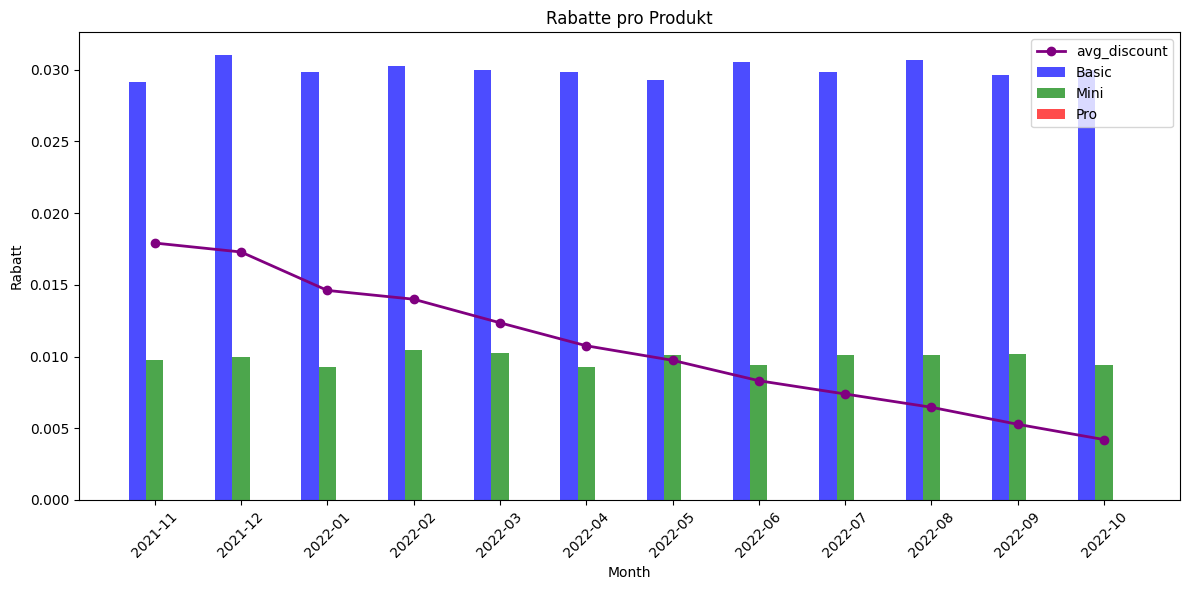

In [50]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (1 - df_discounts_basic_monthly['discount']), width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, (1 - df_discounts_mini_monthly['discount']), width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, (1 - df_discounts_pro_monthly['discount']), width=bar_width, label='Pro', color='r', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (1 - df_discounts_monthly['discount']), label='avg_discount', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Produkt')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

## Downtime

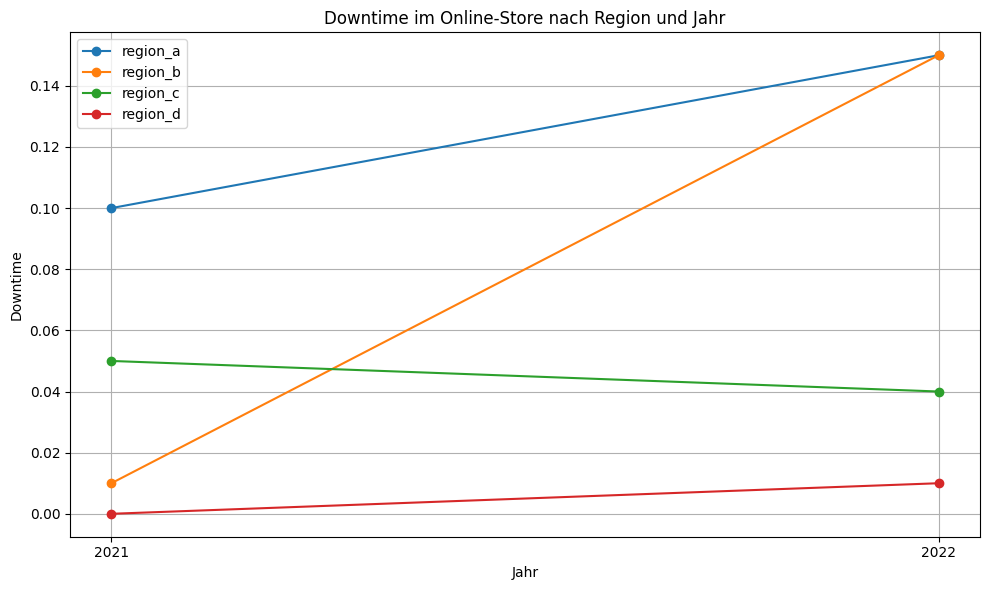

In [53]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot each region's downtime as a line
for region in df_downtime.columns[1:]:
    plt.plot(df_downtime['year'], df_downtime[region], marker='o', label=region)

# Enhance the plot with titles and labels
plt.title('Downtime im Online-Store nach Region und Jahr')
plt.xlabel('Jahr')
plt.ylabel('Downtime')
plt.xticks(df_downtime['year'])

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Kommunizieren